**说明：**缺失部分数据，由于这里只分析年度数据，因此影响不大

## 企业基本情况

### 企业简介

公司是中国白酒龙头，主要生产销售茅台酒及茅台系列酒。按照2016年年报数据，茅台酒的销售收入占公司营业收入的90%以上。 

### 主要业务介绍

公司的主要产品为贵州茅台酒。

茅台酒的生产，历时五年。第一年的端午开始制曲（曲，酿酒所需的糖化发酵剂）。茅台酒每斤酒需要2.4斤高粱和2.6斤小麦，其中小麦就是用来生产酒曲的。制曲工作重阳节前结束。

酿酒从重阳节开始，名为“重阳下沙”。沙，指本地红而细小的糯高粱。下沙，就是指投放制酒主料——高粱。重阳节之后的三个月里，发酵、蒸煮、摊凉、再下新沙、加酒曲、发酵、蒸煮。到12月或次年元月开始首次蒸馏出酒。之后对酒糟进行摊凉、加曲、收堆、下窖。如此周而复始，约每月取酒一次，直到次年8月第七次酒取完。 

第三次至第五次出的酒称为“大回酒”，第六次得到的酒为“小回酒”，第七次的酒为“追糟酒”。大回酒最好喝，第一次、第二次酸涩辛辣，最后一次发焦发苦，但每次的酒都有特别用处。新酒产生后会装入酒坛封存，形成基酒，并分别以“酱味”“醇甜”和“窖底”三种酒体来归纳和区分。基酒存放3年后，进行勾兑。勾兑不加水，是用几种甚至几十种基酒及少量老酒，按照不同比例调和。之后继续存放半年到一年，完成醇化和老熟后灌装出厂。 

本部生产的成品酒，会大体按照一个基本不产生利润的价格，卖给下属子公司贵州茅台酒销售公司。然后由销售公司按照出厂价卖给经销商、专卖店或者其他购买者。这种做法，是国内几乎所有涉及消费税的企业都会采用的模式。利用消费税只对生产企业征收的特点，合法避税。目前国内粮食白酒的消费税，是售价的20%外加1元/L。

## 行业分析

### 行业概况

公司所处行业为白酒行业。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
produce = pd.read_csv(r'data/month.csv', encoding='gbk', skiprows=2, index_col=False)

In [3]:
# 单位：万千升
produce.columns = ['时间', '白酒当期产量', '白酒累计产量', '白酒同比增长', '白酒累计增长']

In [4]:
produce = produce[1:]
produce = produce[::-1]

In [5]:
produce.index = produce['时间']

In [6]:
s = []
for i in produce.index:
    s.append(i.replace('年', '-').replace('月', ''))

In [7]:
produce.index = [pd.to_datetime(t) for t in s]

In [8]:
produce_year = produce[produce.index.month == 12]

In [9]:
del produce_year['时间']

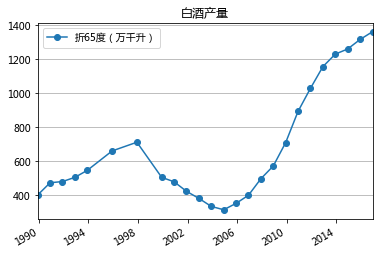

In [10]:
produce_year['白酒累计产量'].plot(marker='o')
plt.title('白酒产量')
plt.grid(axis='y')
plt.legend(('折65度（万千升）',))
plt.show();

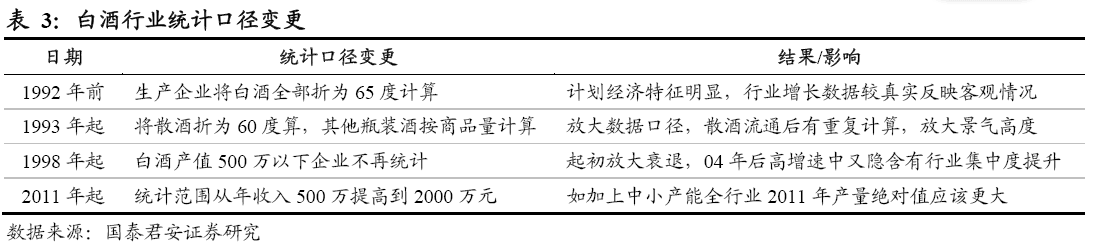

In [11]:
from IPython.display import display, Image
# display(Image(r'pic/1.png', width=100))
display(Image(r'pic/1.png'))

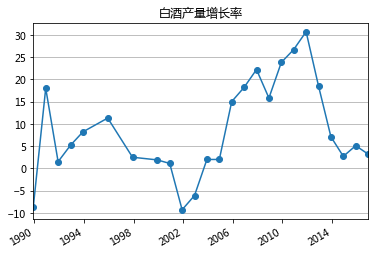

In [12]:
produce_year['白酒累计增长'].plot(marker='o')
plt.title('白酒产量增长率')
plt.grid(axis='y')
plt.show();

## 财务指标分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

In [2]:
# 每行代码均进行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# 设置精度为两位小数
pd.set_option('precision', 2)

In [3]:
# 展示时隐藏代码
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [4]:
# 股票代号

stock_0 = 'SH600519' #贵州茅台
stock_1 = 'SZ000568' #泸州老窖
stock_2 = 'SZ000858' #五粮液
stock_3 = 'SZ002304' #洋河股份

stock_dict = {
    '贵州茅台':'SH600519',
    '泸州老窖':'SZ000568',
    '五粮液':'SZ000858',
    '洋河股份':'SZ002304'
}
# 输入年份（如年报只到2016年，则输入2017）

year = 2017

In [17]:
def get_all_data(stock_id):
    lrb_xq = pd.read_csv(
        r'data/%s_lrb.csv' % (stock_id),
        encoding='utf-8',
        header=0,
        index_col=None)
    fzb_xq = pd.read_csv(
        r'data/%s_fzb.csv' % (stock_id),
        encoding='utf-8',
        header=0,
        index_col=None)
    llb_xq = pd.read_csv(
        r'data/%s_llb.csv' % (stock_id),
        encoding='utf-8',
        header=0,
        index_col=None)

    list_lrb = []
    for i in lrb_xq['报表期截止日']:
        str_i = str(i)
        # i_ = i[:4] + '-' + i[4:6] + '-' + i[6:8]
        list_lrb.append(str(i))
    list_lrb_0 = []
    for i in list_lrb:
        i_ = i[:4] + '-' + i[4:6] + '-' + i[6:8]
        list_lrb_0.append(i_)
    list_fzb = []
    for i in fzb_xq['报表日期']:
        str_i = str(i)
        # i_ = i[:4] + '-' + i[4:6] + '-' + i[6:8]
        list_fzb.append(str_i)
    list_fzb_0 = []
    for i in list_fzb:
        i_ = i[:4] + '-' + i[4:6] + '-' + i[6:8]
        list_fzb_0.append(i_)
    list_llb = []
    for i in llb_xq['报表期截止日']:
        str_i = str(i)
        # i_ = i[:4] + '-' + i[4:6] + '-' + i[6:8]
        list_llb.append(str_i)
    list_llb_0 = []
    for i in list_llb:
        i_ = i[:4] + '-' + i[4:6] + '-' + i[6:8]
        list_llb_0.append(i_)

    lrb_xq['报告时间'] = [pd.to_datetime(t) for t in list_lrb_0]
    fzb_xq['报告时间'] = [pd.to_datetime(t) for t in list_fzb_0]
    llb_xq['报告时间'] = [pd.to_datetime(t) for t in list_llb_0]

    data_temp = pd.merge(lrb_xq, fzb_xq, how='left', on='报告时间')
    data = pd.merge(data_temp, llb_xq, how='left', on='报告时间')

    data.index = data['报告时间']

    data = data[::-1]
    return data

In [18]:
data_0 = get_all_data(stock_0)
data_1 = get_all_data(stock_1)
data_2 = get_all_data(stock_2)
data_3 = get_all_data(stock_3)

In [19]:
def get_data_month(data, month):
    data_month = data[data.index.month == month]
    return data_month

In [20]:
data_year_0 = get_data_month(data_0, 12)
data_year_1 = get_data_month(data_1, 12)
data_year_2 = get_data_month(data_2, 12)
data_year_3 = get_data_month(data_3, 12)

In [23]:
# 部分数据不同表中均有，如财务费用，此时财务费用自动变为财务费用_x,财务费用_y
def get_data_ratio(data):
    result = pd.DataFrame()
    result['净利率'] = data['归属于母公司所有者的净利润'] / data['营业收入']
    result['毛利率'] = (data['营业收入'] - data['营业成本']) / data['营业收入']
    result['三费占比'] = (
        data['销售费用'] + data['管理费用'] + data['财务费用_x']) / data['营业收入']
    result['销售费用率'] = data['销售费用'] / data['营业收入']
    result['管理费用率'] = data['管理费用'] / data['营业收入']
    result['财务费用率'] = data['财务费用_x'] / data['营业收入']
    result['ROE'] = data['归属于母公司所有者的净利润'] / data['归属于母公司股东权益合计']
    result['资产负债率'] = data['负债合计'] / data['资产总计']
    result['应收账款周转天数'] = 365 * data['应收账款'] / data['营业收入']
    result['销售现金流营业收入比'] = data['销售商品、提供劳务收到的现金'] / data['营业收入']
    result['营收增长率'] = data['营业收入'].pct_change(axis=0)
    result['净利润增长率'] = data['归属于母公司所有者的净利润'].pct_change(axis=0)
    
    result['应收票据'] = data['应收票据']
    result['应收账款'] = data['应收账款']
    result['应付票据'] = data['应付票据']
    result['应付账款'] = data['应付账款']
    result['预收款项'] = data['预收款项']
    
    result['营业利润'] = data['营业利润']
    result['营业收入（亿元）'] = data['营业收入'] / 1e8
    result['归母净利润（亿元）'] = data['归属于母公司所有者的净利润'] / 1e8
    result.index = data['报告时间']
    return result

In [24]:
result_0 = get_data_ratio(data_year_0)
result_1 = get_data_ratio(data_year_1)
result_2 = get_data_ratio(data_year_2)
result_3 = get_data_ratio(data_year_3)

In [25]:
l_0 = len(result_0)

s_0 = list(range(l_0))

x_0 = np.array(s_0)

y_0 = tuple([str(i) for i in range(year - l_0, year)])

In [26]:
def data_plot(data, ratio, legend, kind='bar'):
    l_0 = len(data)
    s_0 = list(range(l_0))
    x_0 = np.array(s_0)
    y_0 = tuple([str(i) for i in range(year - l_0, year)])
    
    data[ratio].plot(kind=kind)
    plt.title(ratio)
#     plt.ylabel(ratio)
#     plt.legend([legend], loc='upper left')
    plt.legend([legend])
    plt.xticks(x_0, y_0)
    plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y',alpha=0.4)
    plt.savefig(r'pic/%s.png' % (ratio,))
#     plt.show();
    return

In [27]:
def multi_plot(ratio):
    fig = plt.figure()
    fig.set_figheight(4)
    fig.set_figwidth(24)

    plt.subplot(141)
    data_plot(result_0, ratio, '贵州茅台')
    plt.subplot(142)
    data_plot(result_1, ratio, '泸州老窖')
    plt.subplot(143)
    data_plot(result_2, ratio, '五粮液')
    plt.subplot(144)
    data_plot(result_3, ratio, '洋河股份')
    plt.show();
    return

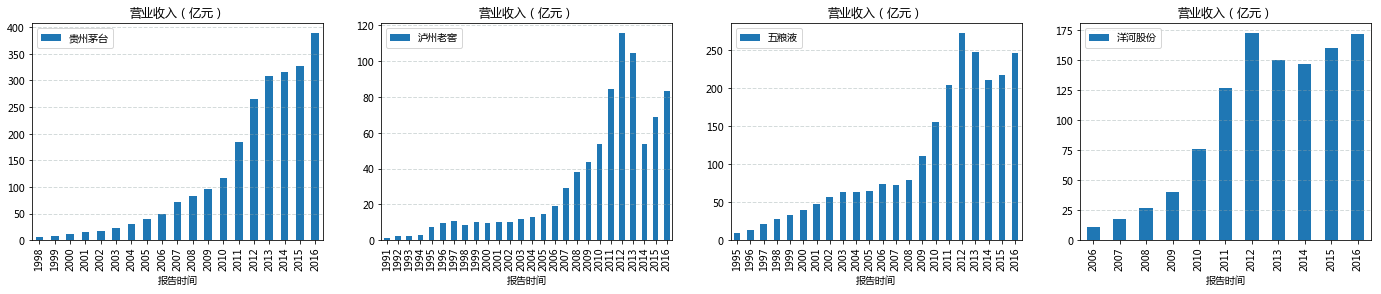

In [28]:
multi_plot('营业收入（亿元）')

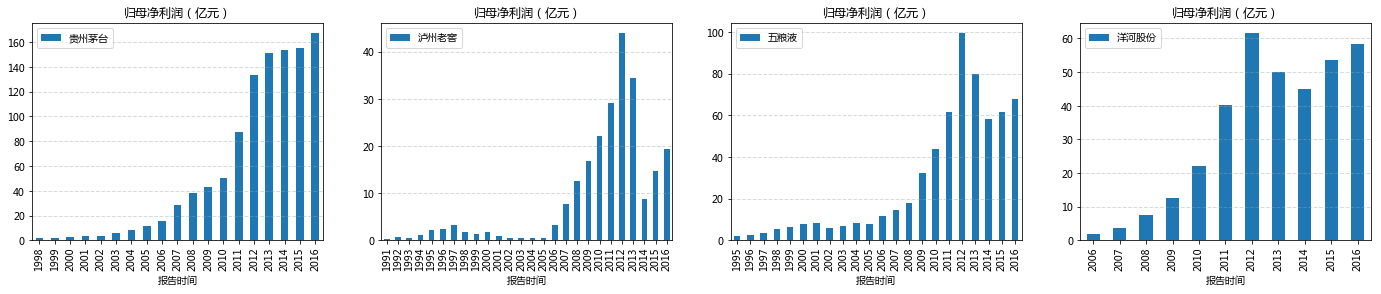

In [29]:
multi_plot('归母净利润（亿元）')

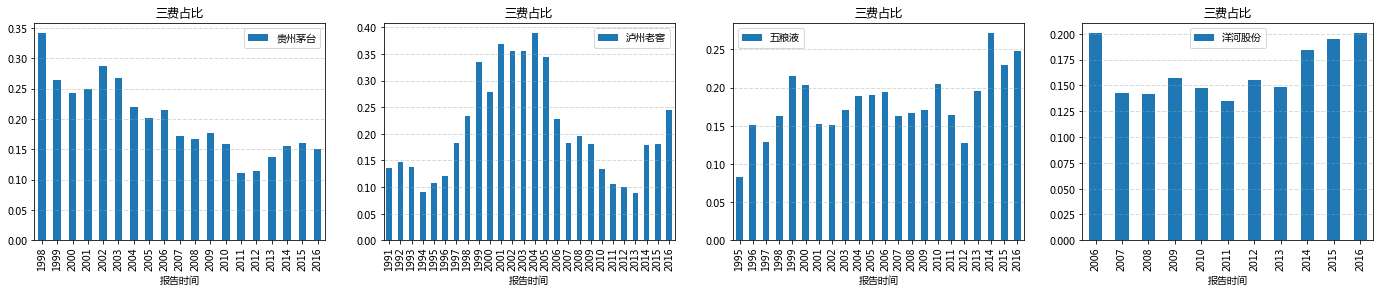

In [30]:
multi_plot('三费占比')

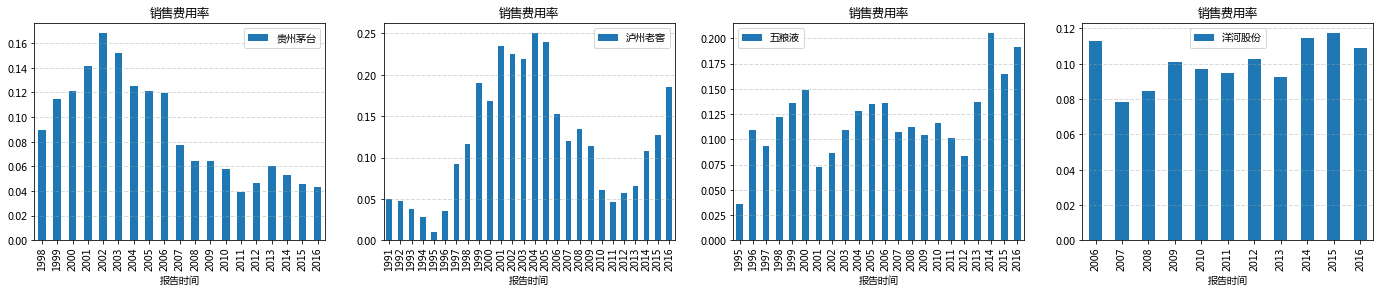

In [31]:
multi_plot('销售费用率')

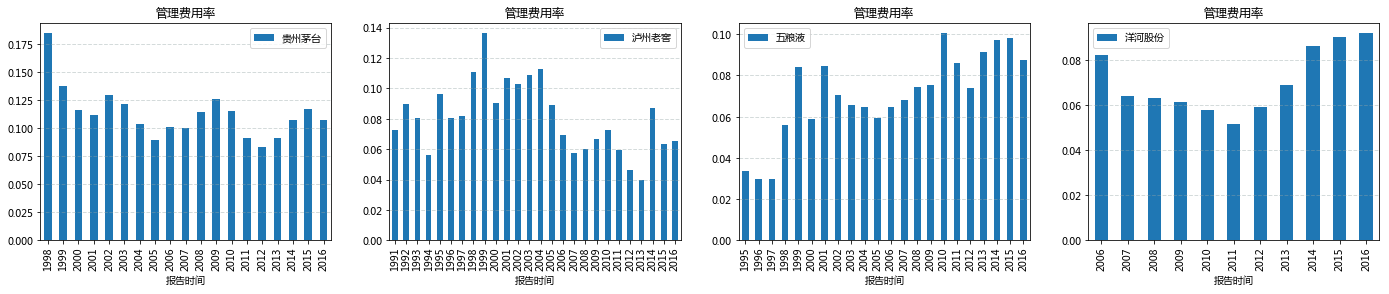

In [32]:
multi_plot('管理费用率')

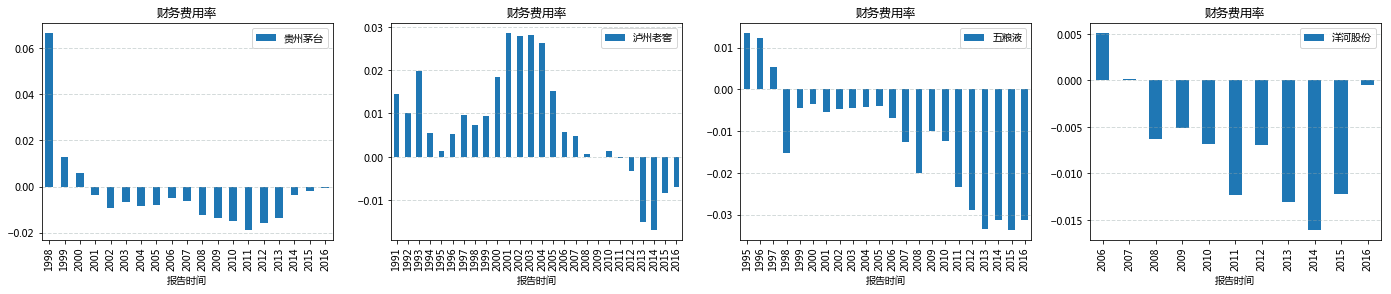

In [33]:
multi_plot('财务费用率')

In [34]:
def ratio_compare(ratio):
    s = pd.DataFrame()
    s['ratio_0'] = result_0[ratio]
    s['ratio_1'] = result_1[ratio]
    s['ratio_2'] = result_2[ratio]
    s['ratio_3'] = result_3[ratio]
    s.index = result_0.index 

    s.plot(kind='line')
    plt.title('%s对比' % (ratio, ))
    plt.ylabel(ratio)
#     plt.legend(['贵州茅台', '泸州老窖', '五粮液', '洋河股份'], loc='upper right')
    plt.legend(['贵州茅台', '泸州老窖', '五粮液', '洋河股份'])
    plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y',alpha=0.4)
    plt.savefig(r'pic/%s对比.png' % (ratio,))
    plt.show();
    return

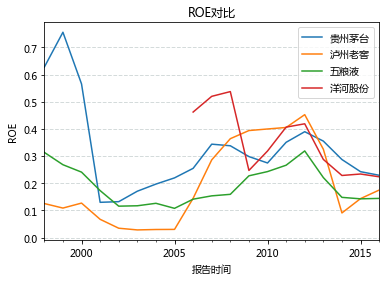

In [35]:
ratio_compare('ROE')

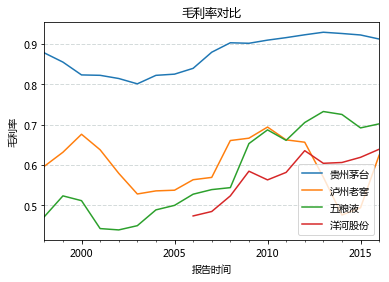

In [36]:
ratio_compare('毛利率')

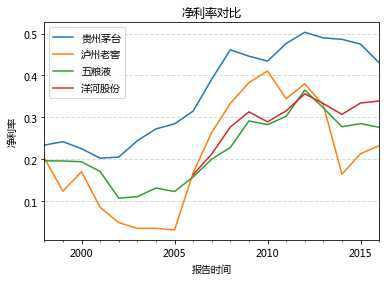

In [37]:
ratio_compare('净利率')

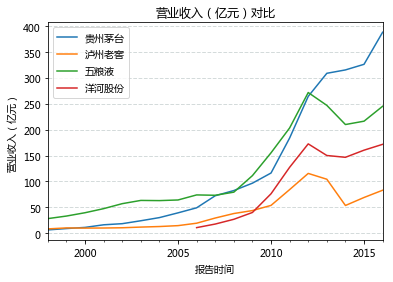

In [38]:
ratio_compare('营业收入（亿元）')

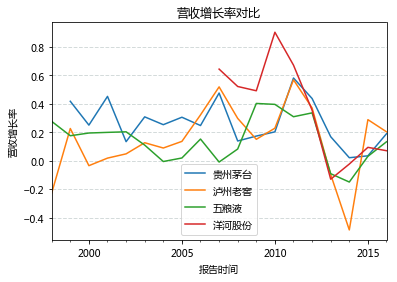

In [39]:
ratio_compare('营收增长率')

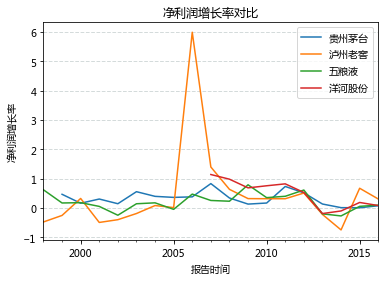

In [40]:
ratio_compare('净利润增长率')

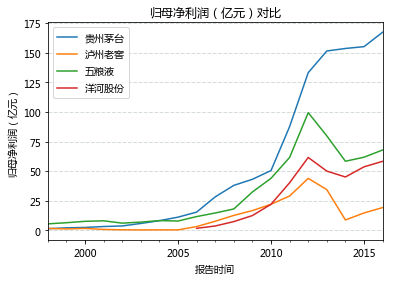

In [41]:
ratio_compare('归母净利润（亿元）')

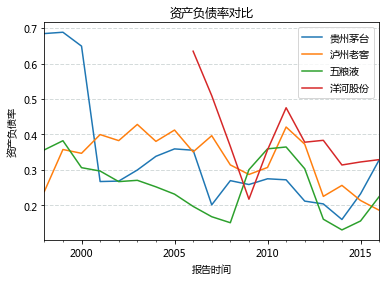

In [42]:
ratio_compare('资产负债率')

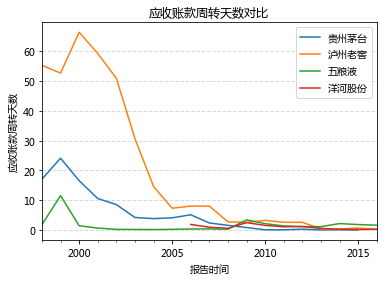

In [43]:
ratio_compare('应收账款周转天数')

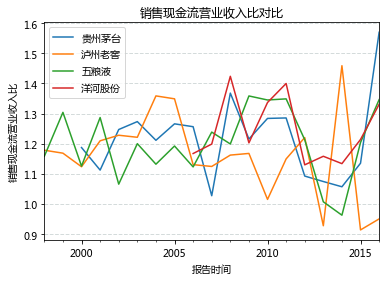

In [44]:
ratio_compare('销售现金流营业收入比')

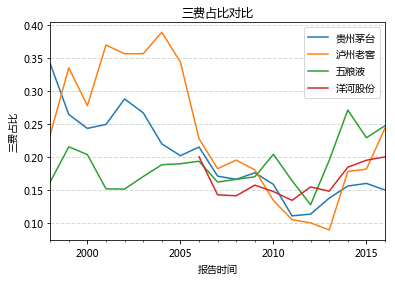

In [45]:
ratio_compare('三费占比')

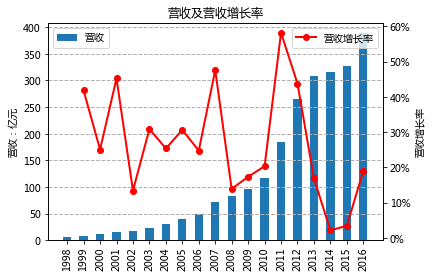

In [46]:
s = pd.DataFrame()
s['营收'] = result_0['营业收入（亿元）']
s['营收增长率'] = result_0['营业收入（亿元）'].pct_change(axis=0) * 100
l_0 = len(result_0)
y_0 = tuple([str(i) for i in range(year - l_0, year)])
s.index = y_0

fmt = '%.0f%%'  #不保留小数
yticks = mtick.FormatStrFormatter(fmt)

fig = plt.figure()
ax = s['营收'].plot(kind='bar', label='营收', use_index=True)
ax.grid(linestyle='--', linewidth=1, axis='y')
plt.title('营收及营收增长率')
plt.ylabel('营收：亿元')
plt.legend(('营收',))

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), s['营收增长率'], color='r', linestyle='-', marker='o', linewidth=2.0)
ax2.yaxis.set_major_formatter(yticks)
plt.ylabel('营收增长率')
plt.legend(('营收增长率', ))
plt.savefig(r'pic\营收及增长率')
plt.show();

In [47]:
s.T

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
营收,6.28,8.91,11.14,16.18,18.35,24.01,30.10,39.31,49.03,72.37,82.42,96.70,116.33,184.02,264.55,309.22,315.74,326.60,388.62
营收增长率,NaN,41.81,25.05,45.25,13.40,30.85,25.35,30.59,24.75,47.60,13.88,17.33,20.30,58.19,43.76,16.88,2.11,3.44,18.99


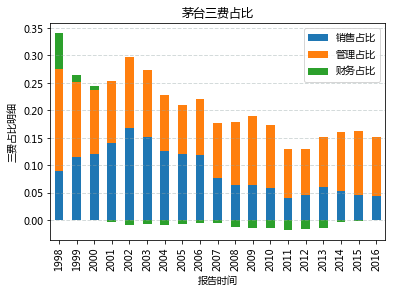

In [48]:
s = pd.DataFrame()
s['销售费用率_0'] = result_0['销售费用率']
s['管理费用率_0'] = result_0['管理费用率']
s['财务费用率_0'] = result_0['财务费用率']
s.index = result_0.index
s.plot(kind='bar', stacked=True)
plt.title('茅台三费占比')
plt.ylabel('三费占比明细')
# plt.legend(['销售占比', '管理占比', '财务占比'], loc='upper left')
plt.legend(['销售占比', '管理占比', '财务占比'])
plt.xticks(x_0, y_0)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y',alpha=0.4)
plt.savefig(r'pic/三费占比_0.png')
plt.show();